### Regresion Logistica

In [191]:
from IPython.display import display, Math , Latex
display(Math(r'L(\beta'))

<IPython.core.display.Math object>

In [192]:
def likelihood(y, pi):
    import numpy as np
    total_sum = 1
    sum_in = list(range(1, len(y) + 1))
    for i in range (len(y)):
        sum_in[i] = np.where(y[i] == 1 , pi[i], 1-pi[i])
        total_sum = total_sum * sum_in[i]
    return total_sum

### Calcular las probrabilidades para cada observacion

In [193]:
def logitprobs(X,beta):
    import numpy as np
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi = list(range(1,n_rows + 1))
    expon = list(range(1,n_rows+1))
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex = X[i][j] * beta[j]
            expon[i] = ex + expon[i]
        with np.errstate(divide="ignore", invalid= "ignore"):
            pi[i] = 1/(1+np.exp(-expon[i]))
        return pi

### Calcular la matriz diagonal W

In [194]:
def findW(pi):
    import numpy as np
    n = len(pi)
    W = np.zeros( n* n).reshape(n,n)
    for i  in range(n):
        print(i)
        W[i,i] = pi[i]* (1-pi[i])
        W[i,i].astype(float)
    return W

### Obtener la solución de  la función logística

In [195]:
def logistics(X, Y, limit):
    import numpy as np
    from numpy import linalg
    nrow = np.shape(X)[0]
    bias = np.ones(nrow).reshape(nrow,1)
    X_new = np.append(X,bias, axis = 1)
    ncol = np.shape(X_new)[1]
    beta = np.zeros(ncol).reshape(ncol,1)
    root_dif = np.array(range(1,ncol+1)).reshape(ncol,1)
    iter_i = 10000
    while(iter_i > limit):
        print(str(iter_i) + "," + str(limit))
        pi = logitprobs(X_new, beta)
        print(pi)
        W = findW(pi)
        print(W)
        num = (np.transpose(np.matrix(X_new))*np.matrix(Y-np.transpose(pi)).transpose())
        den = (np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new))
        root_dif = np.array(linalg.inv(den)*num)
        beta = beta + root_dif
        print(beta)
        iter_i = np.sum(root_dif*root_dif)
        print(iter_i)
        ll = likelihood(Y, pi)
    return beta

## 

## Comprobación experimental

In [196]:
import numpy as np

In [197]:
X = np.array(range(10)).reshape(10,1)

In [198]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [199]:
Y = [0,0,0,0,1,0,1,0,1,1]

In [200]:
bias = np.ones(10).reshape(10,1)
X_new = np.append(X,bias,axis=1)

In [201]:
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [202]:
# a = logistics(X,Y,0.00001)

In [203]:
import statsmodels.api as sm

In [204]:
logit_model = sm.Logit(Y,X_new)

In [205]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [206]:
print(result.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.360   
Dependent Variable: y                AIC:              12.6202 
Date:               2022-10-03 14:59 BIC:              13.2254 
No. Observations:   10               Log-Likelihood:   -4.3101 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.027807
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.6622     0.4001    1.6551   0.0979   -0.1220   1.4464
const    -3.6956     2.2889   -1.6145   0.1064   -8.1818   0.7906



In [207]:
#Regresión logística para predicciones bancarias

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
data = pd.read_csv("../datasets/bank/bank.csv",sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [210]:
data["y"] = (data['y']=="yes").astype(int)
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [211]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [212]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [213]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [214]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [215]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

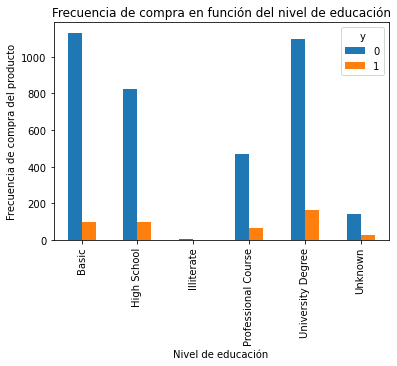

In [216]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

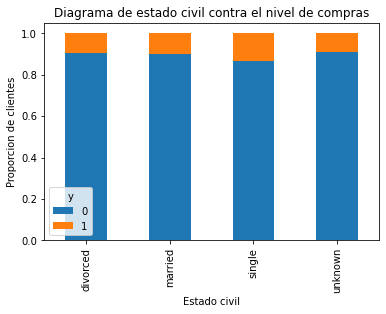

In [217]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked= True)
plt.title("Diagrama de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

### Conversión de las variables categóricas a dummies

In [218]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "day_of_week", "poutcome"]
for category in categories:
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    print(cat_dummies)
    data_new = data.join(cat_dummies)
    data = data_new

      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                1                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              1                0                 0              0   
...          ...              ...               ...            ...   
4114           1                0                 0              0   
4115           1                0                 0              0   
4116           0                0                 0              0   
4117           1                0                 0              0   
4118           0                0                 0              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            0                  0             0   
1                  

In [219]:
data_vars = data.columns.values.tolist()

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_